In [9]:
# packages
import pandas as pd # for data processing
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /Users/ingridlewah/Desktop/Projects/MANGODEV/mangosplit/Netflix_project/dataset


In [4]:
netflix_data = pd.read_csv("dataset/cleaned_netflix_data.csv")

2. Content Preferences on Netflix: Movies vs. TV Shows
-----

In [11]:
# creating a copy of dataset so that will not affect our original dataset.
netflix_df = netflix_data.copy()

In [12]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

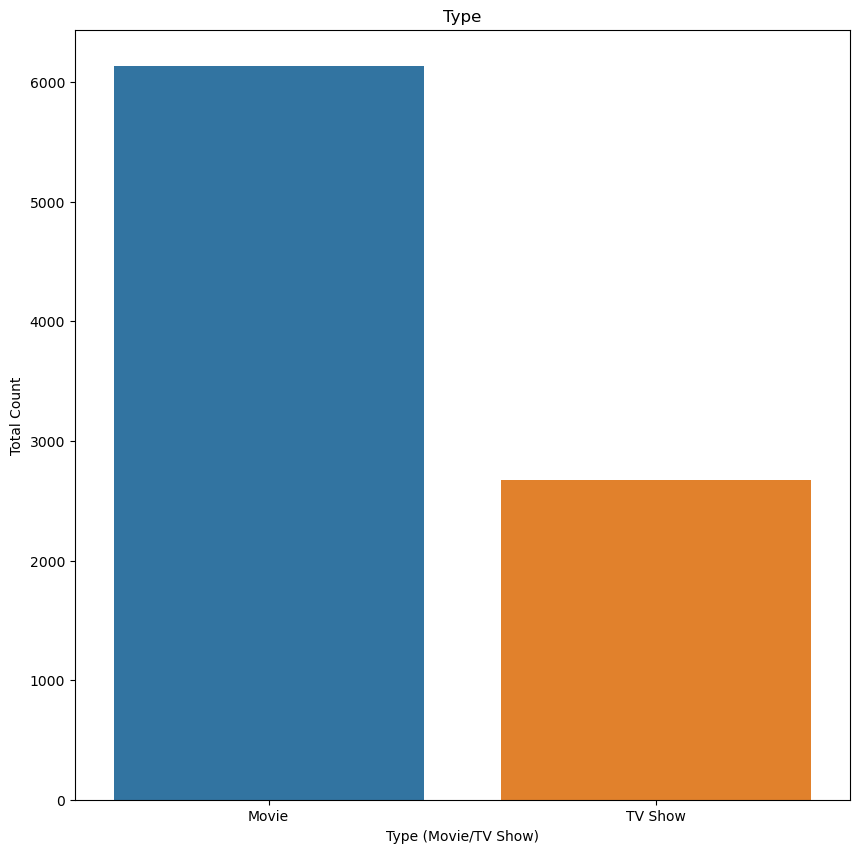

In [19]:
netflix_data_hist = netflix_df['type'].value_counts()

netflix_data_hist_df = pd.DataFrame({'type': netflix_data_hist.index, 'count': netflix_data_hist.values})

plt.figure(figsize=(10, 10))
sns.barplot(x='type', y='count', data=netflix_data_hist_df)
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.title('Type')
plt.show()

3. Netflix visualisation of the rating of shows and movies
------

In [21]:
netflix_df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2161
TV-PG        862
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           289
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

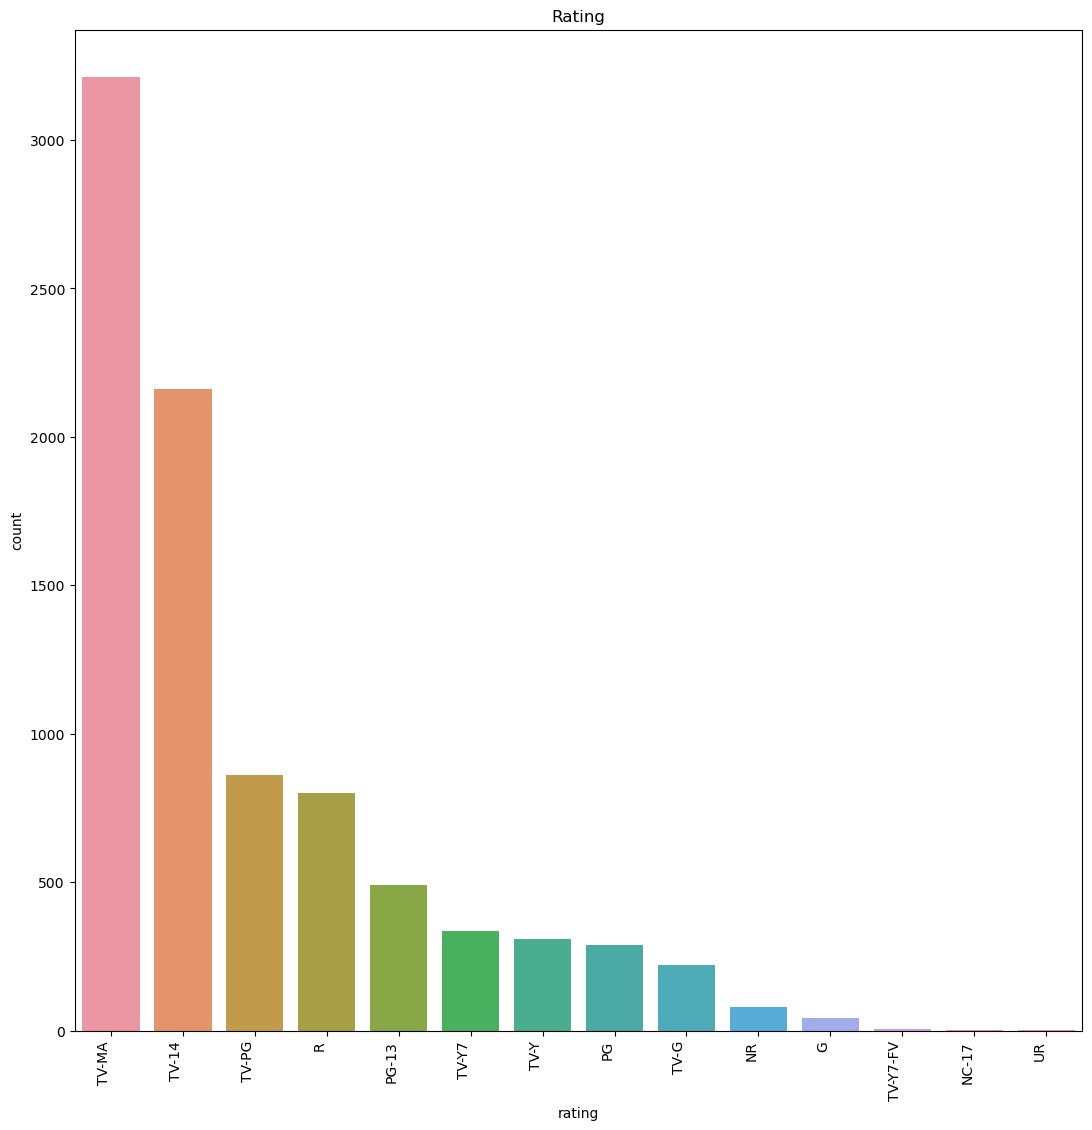

In [23]:
# Create a count plot for the 'rating' column
plt.figure(figsize=(13, 13))
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index)
plt.title('Rating')
plt.xticks(rotation=90, ha="right")

plt.show()